In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
description = pd.read_excel('Data_Description.xlsx',sheet_name = 'Description')
description[:8]

Variable                                         Definition
0               id        A unique id aligned with each comment text. 
1      comment_text                     It includes the comment text. 
2         malignant  It is a column with binary values depicting wh...
3  highly_malignant  Binary column with labels for highly malignant...
4              rude  Binary column with labels for comments that ar...
5            threat  Binary column with labels for threatening cont...
6             abuse  Binary column with labels with abusive behaviour.
7            loathe  Label to comments that are full of loathe and ...

In [3]:
pd.set_option('display.max_colwidth', None)
df=pd.read_csv('train.csv')
df.head(5)

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  \
0                                                                                                                                                                                                                                                                                                                                                                           Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)   
2                                                                                                                                                                                                                                                                                                                                                                                                           Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.   
3  "\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 You, sir, are my hero. Any chance you remember what page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0     

In [4]:
# Looking for shape of the dataset
print('Shape of the dataset:',df.shape)

Shape of the dataset: (159571, 8)


In [5]:
# Looking for the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
# Checking for null values in the dataset
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
# Checking for the datatypes
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [8]:
# Checking for count of unique values in each feature
for s in  df.columns:
    print(s,df[s].nunique())

id 159571
comment_text 159571
malignant 2
highly_malignant 2
rude 2
threat 2
abuse 2
loathe 2


In [9]:
# Checking for count of values in each feature
for s in  df.columns[3:]:
    print(s,'\n',df[s].value_counts())

highly_malignant 
 0    157976
1      1595
Name: highly_malignant, dtype: int64
rude 
 0    151122
1      8449
Name: rude, dtype: int64
threat 
 0    159093
1       478
Name: threat, dtype: int64
abuse 
 0    151694
1      7877
Name: abuse, dtype: int64
loathe 
 0    158166
1      1405
Name: loathe, dtype: int64


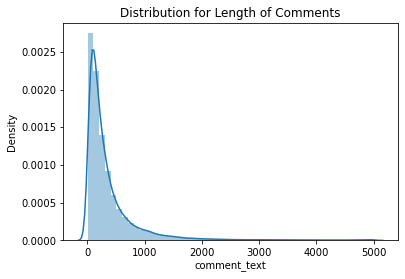

In [10]:
# Visualizing the Length of Comments
lens = df.comment_text.str.len()
sns.distplot(lens)
plt.title("Distribution for Length of Comments")
plt.show()

Observations:

==> The length of comments 0 to 500 are more in number

In [11]:
#Checking the summary of the train datset
df.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

<AxesSubplot:>

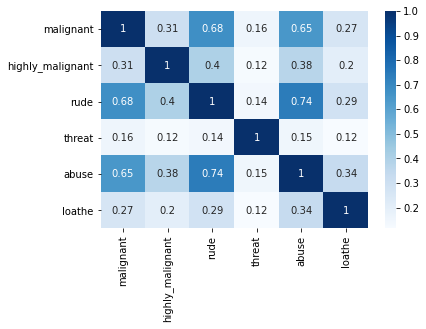

In [12]:
#Checking the Correlation
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Observations:
    
==> From the heatmap, rude is highly correlated with abuse and highly_malignant is negatively correlated with threat.

In [13]:
# Making a list of target_columns
target_columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']

Count of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



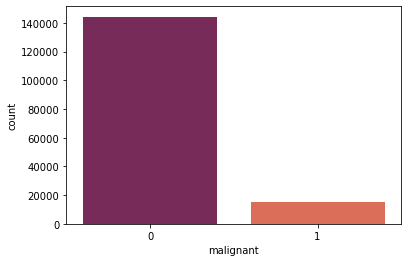

Count of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



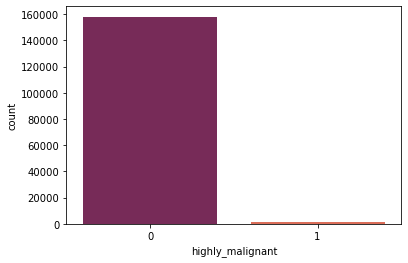

Count of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



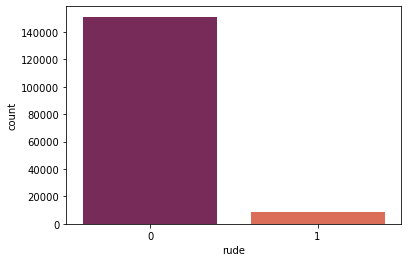

Count of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



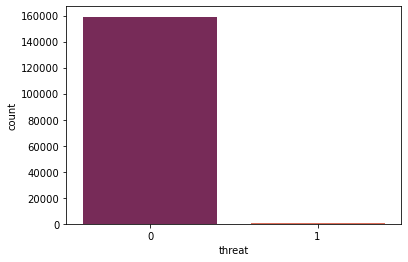

Count of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



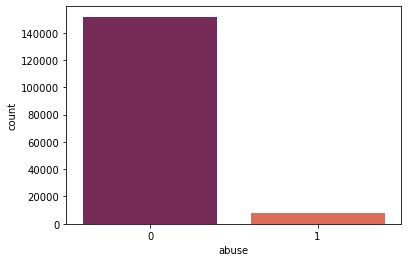

Count of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



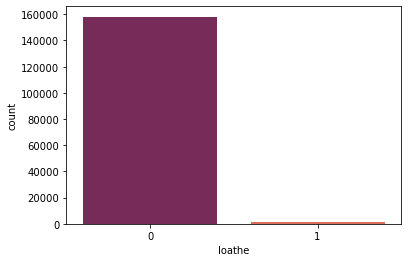

In [14]:
# Visualizing the count of target_columns using count plot
for i in target_columns:
    print("Count of labels for:", i)
    sns.countplot(df[i],palette='rocket')
    print(df[i].value_counts(),'\n')
    plt.show()

In [15]:
# Making a dataframe named target 
Target = df[target_columns]
Target

malignant  highly_malignant  rude  threat  abuse  loathe
0               0                 0     0       0      0       0
1               0                 0     0       0      0       0
2               0                 0     0       0      0       0
3               0                 0     0       0      0       0
4               0                 0     0       0      0       0
...           ...               ...   ...     ...    ...     ...
159566          0                 0     0       0      0       0
159567          0                 0     0       0      0       0
159568          0                 0     0       0      0       0
159569          0                 0     0       0      0       0
159570          0                 0     0       0      0       0

[159571 rows x 6 columns]

<AxesSubplot:>

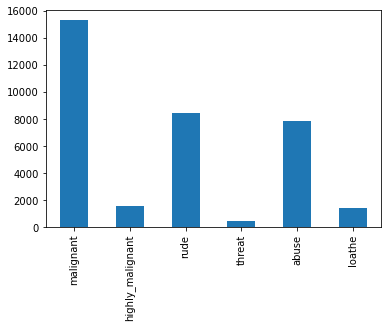

In [16]:
# Plotting a barplot of dataframe(Target)
Target.sum().plot.bar()

In [17]:
# Framing a new feature (label) separating the labels
df['label'] = df[target_columns].max(axis=1)

In [18]:
# Checking the count of each label
df['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

<AxesSubplot:>

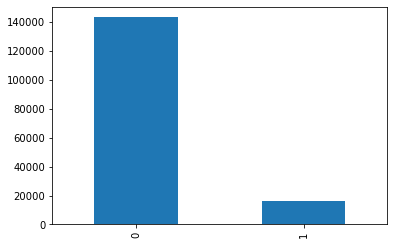

In [19]:
# Plotting the count of label using barplot
df['label'].value_counts().plot.bar()

In [20]:
# Checking the Ratio of label
print('Ratio of label 0 = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print('Ratio of label 1 = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

Ratio of label 0 =  10.0 %
Ratio of label 1 =  90.0 %


In [21]:
# Adding a column(length) which indicates the length of message column
df['length'] = df['comment_text'].str.len()
df.head(4)

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  \
0                                                                                                                                                                                                                                                                                                                                                                           Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)   
2                                                                                                                                                                                                                                                                                                                                                                                                           Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.   
3  "\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "   

   malignant  highly_malignant  rude  threat  abuse  loathe  label  length  
0          0                 0     0       0      0       0      0     264  
1          0                 0     0       0      0       0      0     112  
2          0                 0     0       0      0       0      0     233  
3          0                 0     0       0      0       0      0     622

In [22]:
# Converting all messages to lower case
df['comment_text'] = df['comment_text'].str.lower()
df.head(4)

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  \
0                                                                                                                                                                                                                                                                                                                                                                           explanation\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    d'aww! he matches this background colour i'm seemingly stuck with. thanks.  (talk) 21:51, january 11, 2016 (utc)   
2                                                                                                                                                                                                                                                                                                                                                                                                           hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.   
3  "\nmore\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport  "   

   malignant  highly_malignant  rude  threat  abuse  loathe  label  length  
0          0                 0     0       0      0       0      0     264  
1          0                 0     0       0      0       0      0     112  
2          0                 0     0       0      0       0      0     233  
3          0                 0     0       0      0       0      0     622

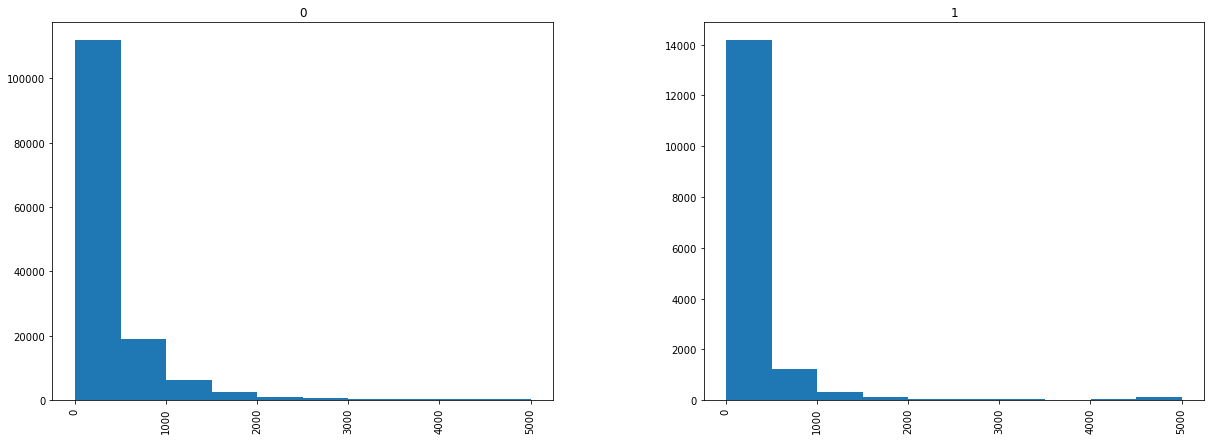

In [23]:
# Visualizing the length of each label
df.hist(column='length', by='label', bins=10, figsize=(20,7));

# Building word dictionary

In [24]:
# Replacing the special characters(@,*,^) with 'emailaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'dollers'
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replacing 10 digit phone numbers (formats include parenthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replacing numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [25]:
# Removing punctuations
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [26]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Looking for stop words in english
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [28]:
# Printing the stop words in english
print(stop_words)

{'myself', 's', "isn't", 'it', 'and', "that'll", "shan't", 'needn', 'ourselves', 'a', 'had', 'doesn', 'up', 'was', 'do', 'i', 'him', 'here', 'we', "shouldn't", 'are', 'm', "you'd", "aren't", 'didn', 'shan', 'very', 'below', 'themselves', 'won', 'wouldn', 'o', 'theirs', 'own', 'their', 'these', 've', "haven't", 'she', 'above', 'yourself', 'all', 'such', "doesn't", 'can', "wouldn't", 'before', 'too', 'on', 'into', 'if', 'what', "hasn't", 'most', 'herself', 'some', 'but', 'by', 'in', 'down', 'isn', 'its', 'now', 'an', 'my', "mustn't", 'd', 'where', "wasn't", 'has', 'so', 'shouldn', 'being', 'to', 'our', 'under', 'of', "needn't", 'them', 'am', 'than', 't', 'few', 'there', 'he', 'hasn', 'out', 'me', 'itself', 'does', 'while', 'how', 'through', 'will', "couldn't", "weren't", 'ain', 'because', 'this', 'yours', 'any', 'don', 'his', 'further', 'other', 'which', 'were', 'himself', 'why', 'that', 'nor', 'did', 'between', 'at', 'have', 'for', 'about', "you'll", 'hadn', 'haven', 'with', 'over', "sh

In [29]:
# Removing stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [30]:
# Adding a new column (clean_length) after punctuations and stopwords removal
df['clean_length'] = df.comment_text.str.len()
df.head()

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                             comment_text  \
0                                                                                                                                                                                                              explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired numbr numbr   
1                                                                                                                                                                                                                                                                                           aww matches background colour seemingly stuck thanks talk numbr numbr january numbr numbr utc   
2                                                                                                                                                                                                                                           hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info   
3  make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later one else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipedia good_article_nominations transport   
4                                                                                                                                                                                                                                                                                                                                                           sir hero chance remember page   

   malignant  highly_malignant  rude  threat  abuse  loathe  label  length  \
0          0                 0     0       0      0       0      0     264   
1          0                 0     0       0      0       0      0     112   
2          0                 0     0       0      0       0      0     233   
3          0                 0     0       0      0       0      0     622   
4          0                 0     0       0      0       0      0      67   

   clean_length  
0           170  
1            93  
2           141  
3           374  
4            29

In [31]:
# Total length removal
print ('Original Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Original Length 62893130
Clean Length 40532086


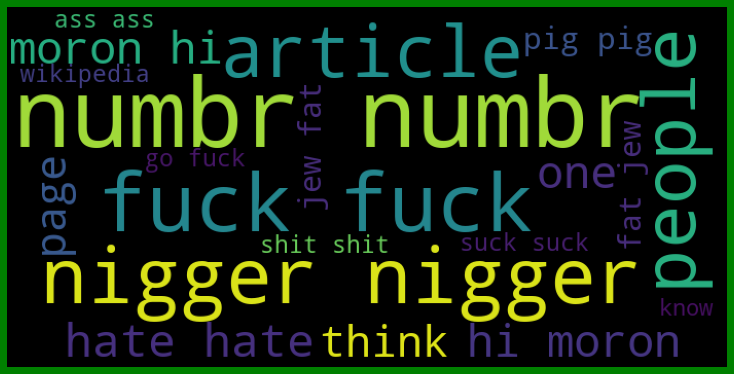

In [32]:
#Getting repeated words in label 1
from wordcloud import WordCloud
label1 = df['comment_text'][df['label']==1]
label1_cloud = WordCloud(width=700,height=350,background_color='black',max_words=20).generate(' '.join(label1))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(label1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

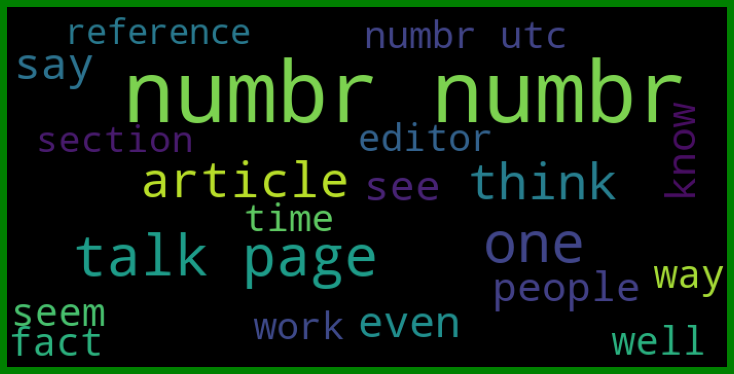

In [33]:
#Getting repeated words in label 0
from wordcloud import WordCloud
label0 = df['comment_text'][df['label']==0]
label0_cloud = WordCloud(width=700,height=350,background_color='black',max_words=20).generate(' '.join(label0))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(label0_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Using TfidfVectorizer to deal the frequent words
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])

#Seperating into input and output variables
x = features
y = df['label']

In [35]:
x.shape

(159571, 10000)

# Feature Extraction

In [36]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
# Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,hamming_loss

In [38]:
#This is a class imbalance problem.So,let's try Undersampling & Oversampling Techniques 

In [39]:
def evaluate_metrics(model):
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred=model.predict(x_test)
    print('Accuracy score of',model,'is:')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    loss = hamming_loss(y_test,pred)
    print("Hamming_loss : {}".format(loss*100))
    loss = log_loss(y_test,pred)
    print("Log_loss : {}".format(loss))

In [40]:
evaluate_metrics(LogisticRegression())

Accuracy score of LogisticRegression() is:
0.9560708130972897
[[28497   174]
 [ 1228  2016]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.92      0.62      0.74      3244

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.95      0.96      0.95     31915

Hamming_loss : 4.392918690271032
Log_loss : 1.5172647230336098


In [41]:
evaluate_metrics(MultinomialNB())

Accuracy score of MultinomialNB() is:
0.9488328372238759
[[28552   119]
 [ 1514  1730]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28671
           1       0.94      0.53      0.68      3244

    accuracy                           0.95     31915
   macro avg       0.94      0.76      0.83     31915
weighted avg       0.95      0.95      0.94     31915

Hamming_loss : 5.116716277612408
Log_loss : 1.7672541753088944


From the above evaluation metrics,it is clear that recall and f1-score has high values for label0 and the label1 has low values. So,oversampling and undersampling should be done.

# Oversampling Using SMOTE Technique

In [42]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
x_res, y_res = sm.fit_sample(x, y.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0))) 

Before OverSampling, counts of label '1': 16225
Before OverSampling, counts of label '0': 143346 

After OverSampling, counts of label '1': 143346
After OverSampling, counts of label '0': 143346


In [43]:
print(x_res.shape,'\t',y_res.shape)

(286692, 10000) 	 (286692,)


In [44]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_res_train,x_res_test,y_res_train,y_res_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [45]:
# describing info about train and test set 
print("Shape of x_train dataset: ", x_res_train.shape) 
print("Shape of y_train dataset: ", y_res_train.shape) 
print("Shape of x_test dataset: ", x_res_test.shape) 
print("Shape of y_test dataset: ", y_res_test.shape) 

Shape of x_train dataset:  (229353, 10000)
Shape of y_train dataset:  (229353,)
Shape of x_test dataset:  (57339, 10000)
Shape of y_test dataset:  (57339,)


In [46]:
model_params = {
    
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params': {
            'alpha':[0.1,0.5,1.0,1.4],
            'fit_prior':['True','False']
        }   
    },
    
     'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'penalty':['l1','l2','elasticnet'],
            'C': [1.0,5.0,7.0,10.0]
        }
    },
    
        'Decision_Tree_Classifier': {
        'model':DecisionTreeClassifier(),
        'params':{
           'criterion':['gini','entropy'],
            'max_depth':[2,6,10,12]
       }
    }
}

In [47]:
# Making a list of scores and appending the parameters to it after hyperparameter tuning
scores = []
from sklearn.model_selection import GridSearchCV,cross_val_score
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_res, y_res)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [48]:
# Making a dataframe best which contains model,best_score & best_params
best= pd.DataFrame(scores,columns=['model','best_score','best_params'])
# Viewing the dataframe
best

model  best_score  \
0             MultinomialNB    0.897158   
1       logistic_regression    0.939360   
2  Decision_Tree_Classifier    0.722727   

                              best_params  
0     {'alpha': 1.4, 'fit_prior': 'True'}  
1            {'C': 10.0, 'penalty': 'l2'}  
2  {'criterion': 'gini', 'max_depth': 12}

In [66]:
# Passing the best fit parameters obtained after hyperparameter tuning using GridSearchCV
lro=LogisticRegression(C = 10.0,penalty ='l2')
mnbo=MultinomialNB(alpha=1.4,fit_prior = True)
dto=DecisionTreeClassifier(criterion = 'gini',max_depth = 12)
rfo = RandomForestClassifier(n_estimators=100)

In [67]:
def evaluate_metrics(model):
    model.fit(x_res_train,y_res_train)
    model.score(x_res_train,y_res_train)
    pred=model.predict(x_res_test)
    print('Accuracy score of',model,'is:')
    print(accuracy_score(y_res_test,pred))
    print(confusion_matrix(y_res_test,pred))
    print(classification_report(y_res_test,pred))
    loss = hamming_loss(y_res_test,pred)
    print("Hamming_loss : {}".format(loss*100))
    loss = log_loss(y_res_test,pred)
    print("Log_loss : {}".format(loss))

In [68]:
evaluate_metrics(lro)

Accuracy score of LogisticRegression(C=10.0) is:
0.9392036833568775
[[26211  2230]
 [ 1256 27642]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     28441
           1       0.93      0.96      0.94     28898

    accuracy                           0.94     57339
   macro avg       0.94      0.94      0.94     57339
weighted avg       0.94      0.94      0.94     57339

Hamming_loss : 6.079631664312248
Log_loss : 2.099861483718377


In [69]:
evaluate_metrics(mnbo)

Accuracy score of MultinomialNB(alpha=1.4) is:
0.8961963061790404
[[25761  2680]
 [ 3272 25626]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     28441
           1       0.91      0.89      0.90     28898

    accuracy                           0.90     57339
   macro avg       0.90      0.90      0.90     57339
weighted avg       0.90      0.90      0.90     57339

Hamming_loss : 10.380369382095955
Log_loss : 3.5852899426851064


In [70]:
evaluate_metrics(dto)

Accuracy score of DecisionTreeClassifier(max_depth=12) is:
0.7232947906311585
[[28195   246]
 [15620 13278]]
              precision    recall  f1-score   support

           0       0.64      0.99      0.78     28441
           1       0.98      0.46      0.63     28898

    accuracy                           0.72     57339
   macro avg       0.81      0.73      0.70     57339
weighted avg       0.81      0.72      0.70     57339

Hamming_loss : 27.670520936884145
Log_loss : 9.557062784189135


In [120]:
evaluate_metrics(rfo)

Accuracy score of RandomForestClassifier() is:
0.8935285053929122
[[2951  310]
 [ 381 2848]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3261
           1       0.90      0.88      0.89      3229

    accuracy                           0.89      6490
   macro avg       0.89      0.89      0.89      6490
weighted avg       0.89      0.89      0.89      6490

Hamming_loss : 10.647149460708782
Log_loss : 3.677433338071902


# Using NearMiss Algorithm for undersampling

In [74]:
print("Before Undersampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0))) 

# applying near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

x_miss, y_miss = nr.fit_sample(x, y.ravel()) 

Before Undersampling, counts of label '1': 16225
Before Undersampling, counts of label '0': 143346 



In [75]:
print('After Undersampling, the shape of x: {}'.format(x_miss.shape)) 
print('After Undersampling, the shape of y: {} \n'.format(y_miss.shape)) 

print("After Undersampling, counts of label '1': {}".format(sum(y_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_miss == 0))) 

After Undersampling, the shape of x: (32450, 10000)
After Undersampling, the shape of y: (32450,) 

After Undersampling, counts of label '1': 16225
After Undersampling, counts of label '0': 16225


In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_miss = sc.fit_transform(x_miss)

In [77]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_miss_train,x_miss_test,y_miss_train,y_miss_test=train_test_split(x_miss,y_miss,test_size=0.2,random_state=42)

In [78]:
# describing info about train and test set 
print("Shape of x_train dataset: ", x_miss_train.shape) 
print("Shape of y_train dataset: ", y_miss_train.shape) 
print("Shape of x_test dataset: ", x_miss_test.shape) 
print("Shape of y_test dataset: ", y_miss_test.shape) 

Shape of x_train dataset:  (25960, 10000)
Shape of y_train dataset:  (25960,)
Shape of x_test dataset:  (6490, 10000)
Shape of y_test dataset:  (6490,)


In [80]:
model_params = {
    
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params': {
            'alpha':[0.1,0.5,1.0,1.4],
            'fit_prior':['True','False']
        }   
    },
    
     'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'penalty':['l1','l2','elasticnet'],
            'C': [1.0,5.0,7.0,10.0]
        }
    },
    
        'Decision_Tree_Classifier': {
        'model':DecisionTreeClassifier(),
        'params':{
           'criterion':['gini','entropy'],
            'max_depth':[2,6,10,12]
       }
    }
}

In [81]:
scores = []
from sklearn.model_selection import GridSearchCV,cross_val_score
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_miss, y_miss)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [82]:
# Making a dataframe best which contains model,best_score & best_params
best= pd.DataFrame(scores,columns=['model','best_score','best_params'])
# Viewing the dataframe
best

model  best_score  \
0             MultinomialNB    0.776271   
1       logistic_regression    0.811957   
2  Decision_Tree_Classifier    0.683729   

                              best_params  
0     {'alpha': 1.4, 'fit_prior': 'True'}  
1             {'C': 1.0, 'penalty': 'l2'}  
2  {'criterion': 'gini', 'max_depth': 12}

In [83]:
# Passing the best fit parameters obtained after hyperparameter tuning using GridSearchCV
lru=LogisticRegression(C = 1.0,penalty ='l2')
mnbu=MultinomialNB(alpha=1.4,fit_prior = True)
dtu=DecisionTreeClassifier(criterion = 'gini',max_depth = 12)
rfu = RandomForestClassifier(n_estimators=100)

In [84]:
def evaluate_metrics(model):
    model.fit(x_miss_train,y_miss_train)
    model.score(x_miss_train,y_miss_train)
    pred=model.predict(x_miss_test)
    print('Accuracy score of',model,'is:')
    print(accuracy_score(y_miss_test,pred))
    print(confusion_matrix(y_miss_test,pred))
    print(classification_report(y_miss_test,pred))
    loss = hamming_loss(y_miss_test,pred)
    print("Hamming_loss : {}".format(loss*100))
    loss = log_loss(y_miss_test,pred)
    print("Log_loss : {}".format(loss))

In [85]:
evaluate_metrics(lru)

Accuracy score of LogisticRegression() is:
0.8254237288135593
[[2728  533]
 [ 600 2629]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3261
           1       0.83      0.81      0.82      3229

    accuracy                           0.83      6490
   macro avg       0.83      0.83      0.83      6490
weighted avg       0.83      0.83      0.83      6490

Hamming_loss : 17.457627118644066
Log_loss : 6.0297164623827575


In [86]:
evaluate_metrics(mnbu)

Accuracy score of MultinomialNB(alpha=1.4) is:
0.7759630200308166
[[2297  964]
 [ 490 2739]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      3261
           1       0.74      0.85      0.79      3229

    accuracy                           0.78      6490
   macro avg       0.78      0.78      0.77      6490
weighted avg       0.78      0.78      0.77      6490

Hamming_loss : 22.403697996918336
Log_loss : 7.738081924518158


In [87]:
evaluate_metrics(dtu)

Accuracy score of DecisionTreeClassifier(max_depth=12) is:
0.7292758089368259
[[3170   91]
 [1666 1563]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      3261
           1       0.94      0.48      0.64      3229

    accuracy                           0.73      6490
   macro avg       0.80      0.73      0.71      6490
weighted avg       0.80      0.73      0.71      6490

Hamming_loss : 27.07241910631741
Log_loss : 9.350493511436706


In [88]:
evaluate_metrics(rfu)

Accuracy score of RandomForestClassifier() is:
0.8947611710323575
[[2950  311]
 [ 372 2857]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3261
           1       0.90      0.88      0.89      3229

    accuracy                           0.89      6490
   macro avg       0.89      0.89      0.89      6490
weighted avg       0.89      0.89      0.89      6490

Hamming_loss : 10.523882896764253
Log_loss : 3.6348586983859463


In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [90]:
rfo.fit(x_res_train,y_res_train)
rfo.score(x_res_train,y_res_train)
predrfo=rfo.predict(x_res_test)
print('Accuracy score of',rfo,'is:')
print(accuracy_score(y_res_test,predrfo))
print(confusion_matrix(y_res_test,predrfo))
print(classification_report(y_res_test,predrfo))

Accuracy score of RandomForestClassifier() is:
0.9770138997889743
[[27362  1079]
 [  239 28659]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     28441
           1       0.96      0.99      0.98     28898

    accuracy                           0.98     57339
   macro avg       0.98      0.98      0.98     57339
weighted avg       0.98      0.98      0.98     57339



In [91]:
predlro=lro.predict(x_res_test)
predlro

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

# AUC-ROC CURVE

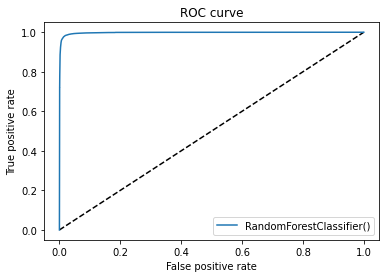

In [122]:
rfo=RandomForestClassifier(n_estimators=100)
rfo.fit(x_res_train,y_res_train)
y_pred_prob=rfo.predict_proba(x_res_test)[:,1]
y_pred_prob

fpr,tpr,threshold=roc_curve(y_res_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier()')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
#auc_score = roc_auc_score(y_res_test,predrfo)
#print(auc_score)

In [93]:
df_test=pd.read_csv('test.csv')
df_test

id  \
0       00001cee341fdb12   
1       0000247867823ef7   
2       00013b17ad220c46   
3       00017563c3f7919a   
4       00017695ad8997eb   
...                  ...   
153159  fffcd0960ee309b5   
153160  fffd7a9a6eb32c16   
153161  fffda9e8d6fafa9e   
153162  fffe8f1340a79fc2   
153163  ffffce3fb183ee80   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      comment_text  
0                                                                                                                                                  Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                             == From RfC == \n\n The title is fine as it is, IMO.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                       " \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "  
3                                                                                                                                                                                                                                                                                                                    :If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        I don't anonymously edit articles at all.  
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ...  
153159                                                            

In [94]:
# Adding a column(length) which indicates the length of comment_text column
df_test['length'] = df_test['comment_text'].str.len()

df_test['comment_text'] = df_test['comment_text'].str.lower()


# Replacing the special characters(@,*,^) with 'emailaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'dollers'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replacing 10 digit phone numbers (formats include parenthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replacing numbers with 'numbr'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Removing punctuations
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$', '')

# Removing stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

# Adding a new column (clean_length) after punctuations and stopwords removal
df_test['clean_length'] = df_test.comment_text.str.len()

# Total length removal
print ('Original Length', df_test.length.sum())
print ('Clean Length', df_test.clean_length.sum())

Original Length 55885733
Clean Length 35980448


In [95]:
df_test.head(2)

id  \
0  00001cee341fdb12   
1  0000247867823ef7   

                                                                                                                                                                                                                                comment_text  \
0  yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap pethedic white faces get kiss ass guys sicken ja rule pride da music man diss shit nothin wrong bein like tupac brother fuckin white boys get things right next time   
1                                                                                                                                                                                                                         rfc title fine imo   

   length  clean_length  
0     367           233  
1      50            18

In [96]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
test = tf_vec.fit_transform(df_test['comment_text'])

In [97]:
test.shape

(153164, 10000)

In [107]:
# Testing the predictions on test dataset
predictions=rfo.predict(test)
predictions

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [108]:
df_test['predictions'] = predictions
df_test

id  \
0       00001cee341fdb12   
1       0000247867823ef7   
2       00013b17ad220c46   
3       00017563c3f7919a   
4       00017695ad8997eb   
...                  ...   
153159  fffcd0960ee309b5   
153160  fffd7a9a6eb32c16   
153161  fffda9e8d6fafa9e   
153162  fffe8f1340a79fc2   
153163  ffffce3fb183ee80   

                                                                                                                                                                                                                                                                                                                                 comment_text  \
0                                                                                                   yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap pethedic white faces get kiss ass guys sicken ja rule pride da music man diss shit nothin wrong bein like tupac brother fuckin white boys get things right next time   
1                                                                                                                                                                                                                                                                                                                          rfc title fine imo   
2                                                                                                                                                                                                                                                                                                                 sources zawe ashton lapland   
3                                                                                                                                                                                                                               look back source information updated correct form guess source updated shall update information thank message   
4                                                                                                                                                                                                                                                                                                                   anonymously edit articles   
...                                                                                                                                                                                                                                                                                                                                       ...   
153159                                                                                                                                                                                                                                                                                                  totally agree stuff nothing long crap   
153160                                                                                                                                                                                                                          throw field home plate get faster throwing cut man direct fielder fielders mickey mantle era better arms rich   
153161                                                                                     okinotorishima categories see changes agree correct gotten confused found acknowledging japan territorial rights okinotorishima however category acknowledge japan claim exclusive economic zone eez stemming okinotorishima category disputed eez   
153162  one founding nations eu germany law return quite similar israel actually true germany allows people whose ancestors citizens germany return afaik allow descendants anglo saxons return angeln saxony israel contrast allows jews return israel even trace particular ancestral line anyone lived modern state even

In [115]:
# Storing the predictions to a csv file
df_test.to_csv('Test_Predictions.csv')

In [117]:
# Saving the best fit model in a pickle file
import joblib
joblib.dump(rfo,"Malignant_Comments_Classifier.pkl")

['Malignant_Comments_Classifier.pkl']